>
> # MaaS Sim tutorial
>
> ## Synthetic demand generation
>
-----

We generate `params.nP` trip requests (`inData.requests`).

Requests are defined through:
* origin (node of `inData.G` graph)
* destinations (node of `inData.G` graph)
* treq (requested departure time)

----

* origins are drawn from random distribution `math.exp(_params.demand_structure.origins_dispertion*x))`, where `x` is distance from `inData.networkStats.center` (in meters)
* destinations similarly, yet with `_params.demand_structure.destinations_dispertion`
* treq is drawn from uniform distribution between $[t0-T/2,t0+T/2]$, where $t0$ is `params.t0` and $T$ is `params.simTime' (optionally normal distribution may be applied, but it seems impractical)

----

We use function `generate_demand` from `dataStructures.ipynb` to generate the demand

We visualize the demand with `plot_demand` from `utils/plot_utils.ipynb`

----

* `dist` of requerst is given im meters
* `ttrav` of request is either calculated as dist divided by `params.avg_speed` (in [m/s]) or estimated using real-time data (in general travel times shall be estimarted within current study using givwen assumption on trip time and speed).



In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import MaaSSim.utils
from MaaSSim.data_structures import structures as inData

In [3]:
params = MaaSSim.utils.get_config('../../data/config/default.json')  # load configuration

In [4]:
inData = MaaSSim.utils.load_G(inData, params) #download_G(inData) # download the graph for the 'p

### Syntehtic demand parameterization

In [5]:
params.nP = 50 #number of passengers

In [6]:
params.city

'Nootdorp, Netherlands'

In [7]:
params.simTime #demand simulation time [hours]

1

In [8]:
params.t0 #midpoint of simulated period

Timestamp('2020-11-25 14:14:21')

In [9]:
params.demand_structure

DotMap(origins_dispertion=-0.0003, destinations_dispertion=-0.001, temporal_dispertion=0.3, temporal_distribution='uniform')

### Synthetic demand generation

In [10]:
inData = MaaSSim.utils.generate_demand(inData, params)

In [11]:
inData.requests[['origin','destination','treq']].head(10)

,origin,destination,treq
0,838045951,1431454100,2020-11-25 13:44:33
1,506392508,515740406,2020-11-25 13:45:20
2,44993506,45014758,2020-11-25 13:45:56
3,441422910,45003905,2020-11-25 13:46:04
4,44981880,44970065,2020-11-25 13:47:51
5,519520392,541199371,2020-11-25 13:48:45
6,45027855,1658828038,2020-11-25 13:50:02
7,45002624,44986197,2020-11-25 13:53:13
8,515740406,44996737,2020-11-25 13:55:26
9,45033209,44987842,2020-11-25 13:55:39


### Visualization

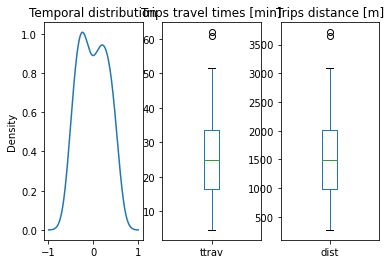

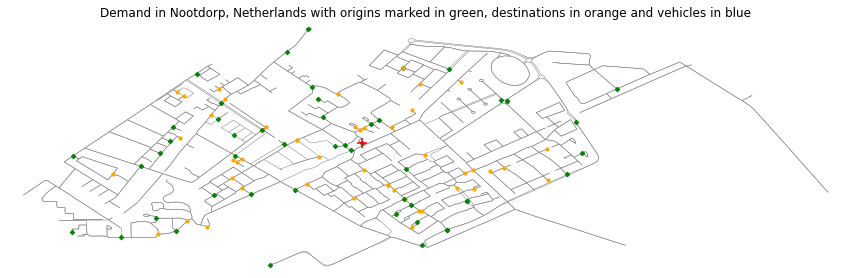

In [12]:
from MaaSSim.visualizations import plot_demand
plot_demand(inData, params = params)

<AxesSubplot:title={'center':'Trip distances'}, ylabel='Frequency'>

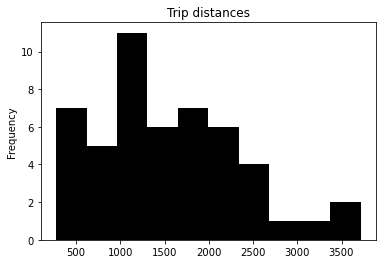

In [13]:
inData.requests.dist.plot(kind='hist',title='Trip distances',color='black')

<AxesSubplot:title={'center':'Origin distances to center'}, ylabel='Frequency'>

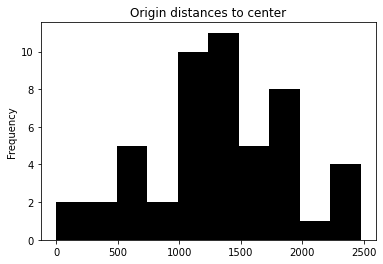

In [14]:
inData.skim[inData.stats['center']][inData.requests.origin].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

<AxesSubplot:title={'center':'Origin distances to center'}, ylabel='Frequency'>

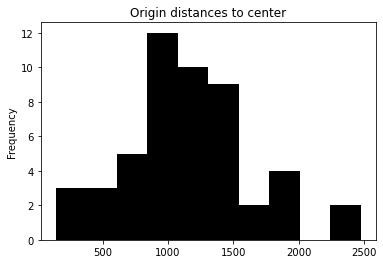

In [15]:
inData.skim[inData.stats['center']][inData.requests.destination].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl